In [1]:
import torch
from torch.nn import functional
import pandas as pd
import time 
import matplotlib.pyplot as plt

In [3]:
#datset
data=pd.read_csv("dataset/xor.csv")
X = data[['x1', 'x2']].values
y = data['class label'].values

In [5]:
device = ('cuda:0' if torch.cuda.is_available() else 'cpu')
device

'cuda:0'

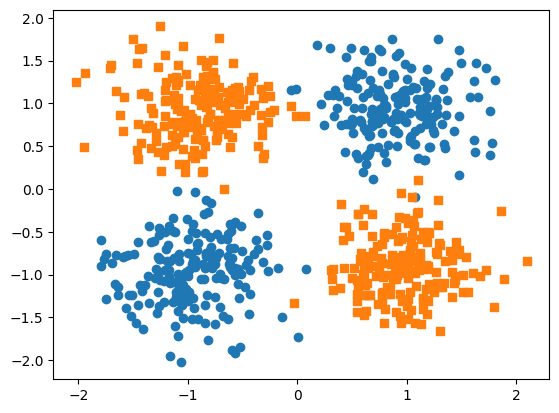

In [6]:
plt.scatter(X[y==0, 0], X[y==0, 1], marker='o')
plt.scatter(X[y==1, 0], X[y==1, 1], marker='s')
plt.show()

In [33]:
class MLP(torch.nn.Module):
    def __init__(self,num_hidden1, classes=2,features=2):
        super(MLP, self).__init__()
        self.features=features
        self.classes=classes
        self.layer1=torch.nn.Linear(features,num_hidden1)
        self.layer2=torch.nn.Linear(num_hidden1,classes)

    def forward(self,x):
        out=self.layer1(x)
        logits=self.layer2(out)
        probs = functional.softmax(logits, dim=1)
        return logits, probs
    

def train(features, targets,model,epochs=20):
    start = time.time()
    batch_lost = []

    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
    for epoch in range(epochs):
        logits,_ = model(features)

        loss = functional.cross_entropy(logits, targets)
        optimizer.zero_grad()

        loss.backward()
        batch_lost.append(loss)
        ### UPDATE MODEL PARAMETERS
        optimizer.step()

        ### LOGGING

        print (f'Epoch: {epoch:03d}/{epochs:03d} | Cost: {loss:.4f}')

    end=time.time()-start
    print(f'Total Training Time:{end:.4f}' )

In [34]:
%%time
torch.manual_seed(42)
model=MLP(50)
model=model.to(device)
features = torch.tensor(X, dtype=torch.float).to(device)
targets = torch.tensor(y, dtype=torch.long).to(device)
train(features,targets,model)

Epoch: 000/020 | Cost: 0.7744
Epoch: 001/020 | Cost: 0.7195
Epoch: 002/020 | Cost: 0.7009
Epoch: 003/020 | Cost: 0.6952
Epoch: 004/020 | Cost: 0.6935
Epoch: 005/020 | Cost: 0.6929
Epoch: 006/020 | Cost: 0.6928
Epoch: 007/020 | Cost: 0.6927
Epoch: 008/020 | Cost: 0.6927
Epoch: 009/020 | Cost: 0.6927
Epoch: 010/020 | Cost: 0.6927
Epoch: 011/020 | Cost: 0.6927
Epoch: 012/020 | Cost: 0.6927
Epoch: 013/020 | Cost: 0.6927
Epoch: 014/020 | Cost: 0.6927
Epoch: 015/020 | Cost: 0.6927
Epoch: 016/020 | Cost: 0.6927
Epoch: 017/020 | Cost: 0.6927
Epoch: 018/020 | Cost: 0.6927
Epoch: 019/020 | Cost: 0.6927
Total Training Time:0.0406
CPU times: total: 109 ms
Wall time: 1.21 s


C:\Users\HP\AppData\Local\Temp\ipykernel_13768\1117944054.py:15: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
C:\Users\HP\AppData\Local\Temp\ipykernel_13768\1117944054.py:16: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  np.arange(x2_min, x2_max, resolution))
C:\Users\HP\AppData\Local\Temp\ipykernel_13768\1117944054.py:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Ma

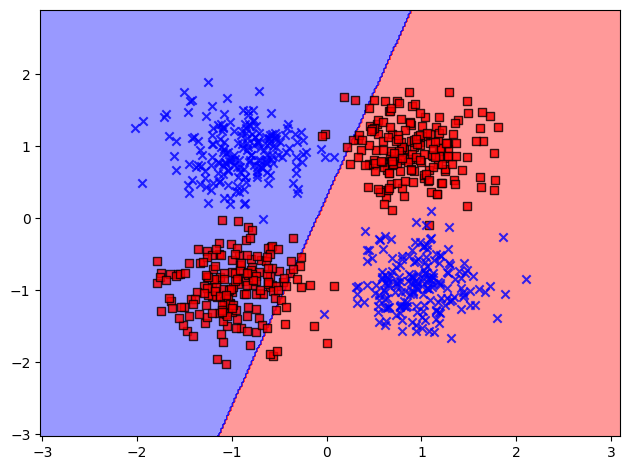

In [25]:
from matplotlib.colors import ListedColormap
import numpy as np


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    tensor = torch.tensor(np.array([xx1.ravel(), xx2.ravel()]).T, device=device).float()
    logits,probs = classifier.forward(tensor)
    Z = np.argmax(probs.tolist(), axis=1)

    Z = Z.reshape(xx1.shape)
    cmap = ListedColormap(colors[:len(np.unique(y))])
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

plot_decision_regions(features.to('cpu'), targets.to('cpu'), classifier=model)

plt.tight_layout()
#plt.savefig('xor1.pdf')
plt.show()

In [41]:
class MLP_relu(torch.nn.Module):
    def __init__(self,num_hidden1, classes=2,features=2):
        super(MLP_relu, self).__init__()
        self.features=features
        self.classes=classes
        self.layer1=torch.nn.Linear(features,num_hidden1)
        self.layer2=torch.nn.Linear(num_hidden1,classes)

    def forward(self,x):
        out=self.layer1(x)
        out=functional.relu(out)
        logits=self.layer2(out)
        probs = functional.softmax(logits, dim=1)
        return logits, probs
    
    def train(features, targets,model,epochs=20):
        start = time.time()
        batch_lost = []

        optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
        for epoch in range(epochs):
            logits,_ = model(features)

            loss = functional.cross_entropy(logits, targets)
            optimizer.zero_grad()

            loss.backward()
            batch_lost.append(loss)
            ### UPDATE MODEL PARAMETERS
            optimizer.step()

            ### LOGGING

            print (f'Epoch: {epoch:03d}/{epochs:03d} | Cost: {loss:.4f}')

        end=time.time()-start
        print(f'Total Training Time:{end:.4f}' )

In [42]:
%%time
torch.manual_seed(42)
model2=MLP_relu(50)
model2=model2.to(device)
features = torch.tensor(X, dtype=torch.float).to(device)
targets = torch.tensor(y, dtype=torch.long).to(device)
train(features,targets,model2)

Epoch: 000/020 | Cost: 0.6991
Epoch: 001/020 | Cost: 0.6595
Epoch: 002/020 | Cost: 0.6298
Epoch: 003/020 | Cost: 0.6058
Epoch: 004/020 | Cost: 0.5853
Epoch: 005/020 | Cost: 0.5670
Epoch: 006/020 | Cost: 0.5502
Epoch: 007/020 | Cost: 0.5345
Epoch: 008/020 | Cost: 0.5197
Epoch: 009/020 | Cost: 0.5055
Epoch: 010/020 | Cost: 0.4921
Epoch: 011/020 | Cost: 0.4792
Epoch: 012/020 | Cost: 0.4668
Epoch: 013/020 | Cost: 0.4548
Epoch: 014/020 | Cost: 0.4433
Epoch: 015/020 | Cost: 0.4322
Epoch: 016/020 | Cost: 0.4215
Epoch: 017/020 | Cost: 0.4111
Epoch: 018/020 | Cost: 0.4011
Epoch: 019/020 | Cost: 0.3915
Total Training Time:0.1232
CPU times: total: 188 ms
Wall time: 851 ms


C:\Users\HP\AppData\Local\Temp\ipykernel_13768\3172593211.py:15: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
C:\Users\HP\AppData\Local\Temp\ipykernel_13768\3172593211.py:16: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  np.arange(x2_min, x2_max, resolution))
C:\Users\HP\AppData\Local\Temp\ipykernel_13768\3172593211.py:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Ma

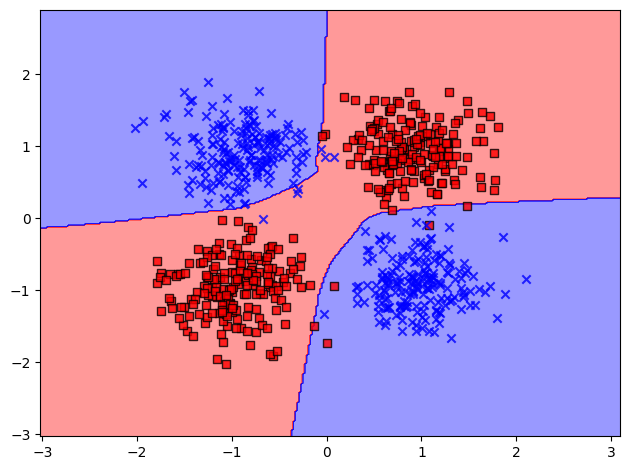

In [43]:
from matplotlib.colors import ListedColormap
import numpy as np


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    tensor = torch.tensor(np.array([xx1.ravel(), xx2.ravel()]).T, device=device).float()
    logits,probs = classifier.forward(tensor)
    Z = np.argmax(probs.tolist(), axis=1)

    Z = Z.reshape(xx1.shape)
    cmap = ListedColormap(colors[:len(np.unique(y))])
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

plot_decision_regions(features.to('cpu'), targets.to('cpu'), classifier=model2)

plt.tight_layout()
#plt.savefig('xor1.pdf')
plt.show()